<a href="https://colab.research.google.com/github/Ebonica/CODE-CRAFTERS-DATA-SCIENCE-EBONICA-SALETH/blob/main/CODE_CRAFTERS_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODE CRAFTERS TASK2 DATA SCIENCE AND MACHINE LEARNING**

**HOUSE PRICE PREDICTIONS USING LOGISTIC REGRESSION**

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**LOADING THE GIVEN DATASET**

In [44]:
from google.colab import files
uploaded=files.upload()

Saving USA_Housing.csv to USA_Housing (1).csv


**READING THE GIVEN DATASET**

In [45]:
data=pd.read_csv("USA_Housing.csv")

In [46]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


**DATA EXPLORATION**

In [47]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLak

In [48]:
print("Last few rows of the dataset:")
print(data.tail())

Last few rows of the dataset:
      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
4995                   USNS Williams\nFPO AP 30153-7

In [49]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None


In [50]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        

In [51]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [52]:
print("\nColumns:")
print(data.columns)


Columns:
Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


In [53]:
print("\nShape:")
print(data.shape)


Shape:
(5000, 7)


In [54]:
print("\nDATA TYPES:")
print(data.dtypes)


DATA TYPES:
Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object


In [55]:
print("\n Access the 21th row (index 20)")
data.iloc[20]


 Access the 21th row (index 20)


Avg. Area Income                                                     86294.999089
Avg. Area House Age                                                      6.627457
Avg. Area Number of Rooms                                                8.011898
Avg. Area Number of Bedrooms                                                 4.07
Area Population                                                      47560.775336
Price                                                              2146925.339889
Address                         030 Larry Park Suite 665\nThomashaven, HI 8794...
Name: 20, dtype: object

In [56]:
unique_counts = data.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64


In [57]:
nunique_counts = data.nunique()


for column in data.columns:
    unique_values = data[column].unique()
    value_counts = data[column].value_counts()

    print(f"Column: {column}")
    print(f"Number of unique values: {nunique_counts[column]}")
    print(f"Unique values: {unique_values}")
    print(f"Value counts:\n{value_counts}\n")

Column: Avg. Area Income
Number of unique values: 5000
Unique values: [79545.45857432 79248.64245483 61287.06717866 ... 63390.6868855
 68001.33123509 65510.58180367]
Value counts:
79545.458574    1
68735.436608    1
71635.473101    1
73211.136245    1
86249.993070    1
               ..
66064.532823    1
59390.346824    1
64661.930276    1
73279.030904    1
65510.581804    1
Name: Avg. Area Income, Length: 5000, dtype: int64

Column: Avg. Area House Age
Number of unique values: 5000
Unique values: [5.68286132 6.00289981 5.86588984 ... 7.25059061 5.53438842 5.99230531]
Value counts:
5.682861    1
7.721909    1
5.866996    1
6.501139    1
6.155403    1
           ..
6.659562    1
5.664971    1
4.656696    1
5.902296    1
5.992305    1
Name: Avg. Area House Age, Length: 5000, dtype: int64

Column: Avg. Area Number of Rooms
Number of unique values: 5000
Unique values: [7.00918814 6.73082102 8.51272743 ... 4.80508098 7.13014386 6.7923361 ]
Value counts:
7.009188     1
7.621975     1
6.07598

**LOGISTIC REGRESSION MODEL**

In [58]:
data['price_category'] = pd.cut(data['Price'], bins=[0, 200000, 400000, float('inf')], labels=['low', 'medium', 'high'])

# Droping non-numeric columns and the target variable
X = data.drop(['Price', 'price_category', 'Address'], axis=1)  # Drop 'address' or other non-numeric columns
y = data['price_category']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating a logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs')

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

In [59]:
print("Predictions:")
print(predictions)

Predictions:
['high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 

**EVALUATING THE PERFORMANCE**

In [60]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.995


In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        high       0.99      1.00      1.00       992
      medium       1.00      0.38      0.55         8

    accuracy                           0.99      1000
   macro avg       1.00      0.69      0.77      1000
weighted avg       1.00      0.99      0.99      1000



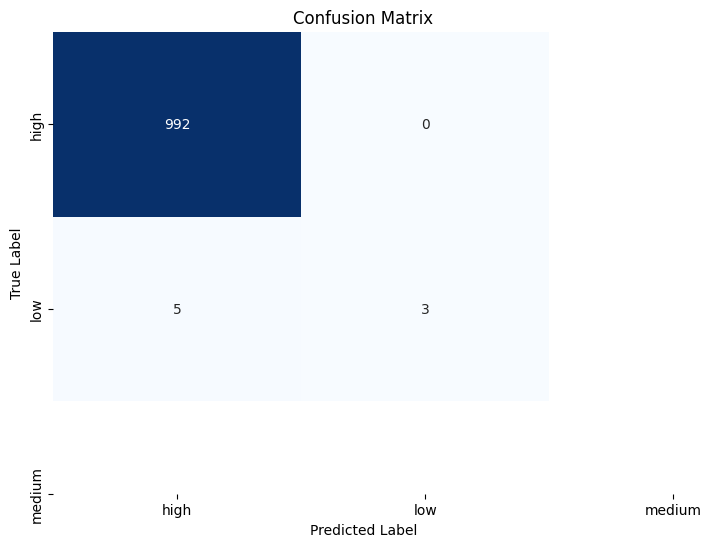

In [62]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**FEATURE IMPORTANCE**

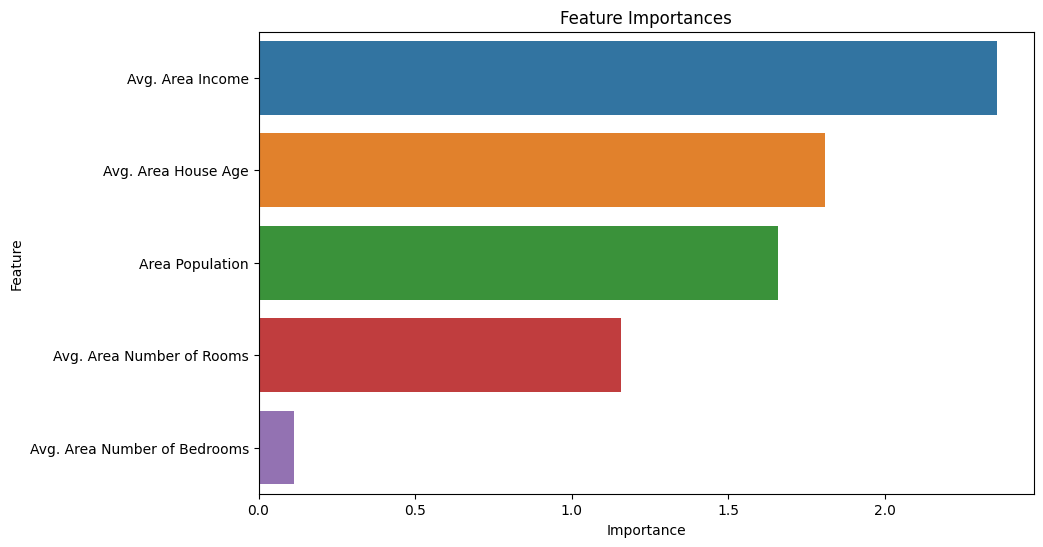

In [63]:
feature_importances = model.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

**LINEAR REGRESSION MODEL**

In [64]:
X = data.drop('Price', axis=1)
y = data['Price']

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [67]:
print("Predictions:")
print(predictions)

Predictions:
[1313227.5573705  1300917.11372168 1215461.55585555 1235529.96036317
 1111423.84088464 1320600.32131036 1254772.33669802 1107784.22706081
 1135962.31690412 1287015.57391445 1024248.78962933 1410040.35815798
 1235617.20413546 1496975.73994382 1283945.53732665 1239646.15808012
 1379444.38615137 1168076.97677608 1069574.85741332 1090209.24517592
 1200341.2908597  1141969.41877436 1311969.56224839 1259838.02537122
 1358047.70311869 1235915.64637012 1267358.39174733 1145616.42047464
 1052000.39806258 1461319.74923469 1214079.77425766 1346436.4784985
 1378379.89442184 1247564.95495889 1303151.91783701 1396171.1332451
 1343895.48129234 1168958.89304564 1412955.36752657 1195562.61045968
 1272263.920571   1158550.88513384 1357915.80950961 1113817.56555942
 1265322.96516159 1253425.32035041 1325543.87092811 1381774.83376387
 1411986.12464445 1181825.19916604 1406378.91287821 1306269.77077427
 1247590.62007277 1214442.40411129 1384834.80663255 1414601.33127401
 1271426.00554758 12604

**EVALUATING THE PERFORMANCE**

In [65]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 53992464172.533264


**PREDICTIONS VS ACTUAL VALUES**

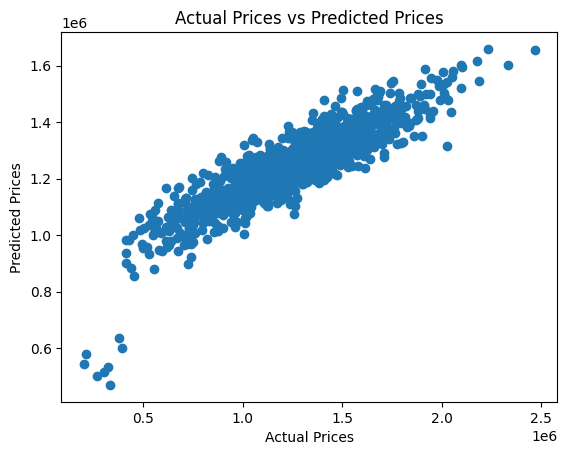

In [66]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()